In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils, plot_help

from pandas.tseries.holiday import USFederalHolidayCalendar as USAHoliday


%matplotlib inline

In [2]:
#modify read_limit and chunk_size parameters based on memory capacity
df = utils.chunk_loader('data/review.json', read_limit=500)

In [3]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [4]:
#check shape matches limit
df.shape

(500, 9)

In [5]:
#time range of recordng
print("Time is record from {} to {}".format(df.date.min(), df.date.max()))
total_delta_days = pd.Timedelta(df.date.max()- df.date.min()).total_seconds()/86400
print("Over a span of {:.0f} days".format(total_delta_days))

Time is record from 2004-12-19 20:56:54 to 2018-10-04 14:49:56
Over a span of 5037 days


### At a quick glance, the dates are not sorted by order

In [6]:
#sort dates from oldest to most recent
df_sort = df.sort_values(by='date')
df_sort.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
226,N2PlDjUJVfOJzsPzY0Au1w,0,2004-12-19 20:56:54,0,6POnAs_4MijROSKeOevXHQ,3,Not the best part of town. Not particularly g...,0,62GNFh5FySkA3MbrQmnqvg
78,6xgcHeLad-VaoTIQewK84A,1,2006-04-14 04:37:51,0,VeJppsRLTWRKh4PkmcOzag,4,ooooooh yummy. i'm a red meat eating midweste...,0,eJEcCIzJ5bqc0QpRGHSVCw
383,E4t43bnsfeOY2bv_8IPmSw,0,2006-04-14 19:39:25,0,8n2atRJI-ZCQ96HROXYFDw,4,Great-tasting deep dish pizzas. They make a m...,0,LxmSRSD9UYN3mbnJZUdlSQ
352,_u1Bq7QsgMUXSMex8QHqLQ,0,2008-12-03 23:39:14,1,Lm1CbxXSIpXJ9TYPQt6-zg,4,"So I once went to see Brent Spiner, the guy wh...",0,XDYnGRhaCQteZNFPZonRow
333,o1dX8oFupfjbBpYgT7TH0w,1,2009-08-03 18:37:10,1,3qwgrPW0hOaWi8R4FYQMBw,3,"This show was fun, but i was expecting more fr...",5,ZMBIjbnvatw6Z6JNPlS99Q


In [7]:
# from tail
df_sort.tail()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
97,xS5HGqgk0KY2jFWU-l_nrA,0,2018-09-25 03:54:06,0,RKGH2ZQHyBNgJwQ84lKMFg,4,I'm not that familiar with Scottsdale so I'm j...,0,pHKISjytTmP0LrP952_32w
84,sk0stgY4NDJYOX1MbNJ3Pg,0,2018-09-25 03:58:48,0,SneRds-D0MCMWbIitd0AHg,1,At least the Pinks concession stand by Section...,0,WThN-4czFfMs1vYhvaf_9A
446,qHQPvp6pZ75fB63kOKUPqg,0,2018-09-25 06:49:39,0,SVOxLL37tIeTzPEukht18g,5,I had two different experiences with Carpet Mo...,0,0-fZISHcPAKveUyZY1SLLg
42,wJj1EwYcXHdvA9zKqmb5hQ,0,2018-10-04 11:20:42,0,NqYSX93Amv4sd5pPPr3Gag,5,I called the number provided and same day they...,0,zFYFuufYWQSPj0r5lrKQKg
152,Z6l0-bY6TklTdr_X88LFVQ,0,2018-10-04 14:49:56,0,GOn4Ggzjsb5d9b5t8K5c1Q,5,We used Creative Bridal for our Vegas wedding ...,0,vmz62dtSK5ZI42DscYzX8Q


Assumptions:
- the time zone corresponds to the business location

### Create a groupby object with set frequenct

In [8]:
df_group = df_sort.groupby(pd.Grouper(key='date', freq='1D'))

In [9]:
# get summation
df_group_sum = df_group.sum()
df_group_sum.head()

,cool,funny,stars,useful
date,,,,
2004-12-19,0,0,3,0
2004-12-20,0,0,0,0
2004-12-21,0,0,0,0
2004-12-22,0,0,0,0
2004-12-23,0,0,0,0


### Infer day of week and if a holiday

In [10]:
#get name of day
name_of_day = df_group_sum.index.weekday_name

#infer the day of week
day_of_week = df_group_sum.index.dayofweek

#get USA holidays
holiday=USAHoliday()

#get range of holidays in USA from start to end of region
holiday_range = holiday.holidays(start=df_sort['date'].min(), end =df_sort['date'].max())

#check if it was a holiday
is_holiday = df_group_sum.index.isin(holiday_range).astype(int)


#make columns
#df_group_sum['name_of_day'] = name_of_day
#df_group_sum['day_of_week'] = day_of_week
#df_group_sum['is_holiday'] = is_holiday

df_group_sum.head()

,cool,funny,stars,useful
date,,,,
2004-12-19,0,0,3,0
2004-12-20,0,0,0,0
2004-12-21,0,0,0,0
2004-12-22,0,0,0,0
2004-12-23,0,0,0,0


##### Make use of this post:

https://stackoverflow.com/questions/48973471/how-to-highlight-weekends-for-time-series-line-plot-in-python

In [11]:
def highlight(indices,ax):
    i=0
    while i<len(indices)-1:
        #to make sure we dont fill between a Sunday and the next Saturday
        if pd.Timedelta(indices[i+1]-indices[i]).total_seconds()/3600/24<1:
            ax.axvspan(indices[i], indices[i+1], facecolor='pink', edgecolor='none', alpha=.2, lw=100)
        i+=1

In [12]:
def find_weekend_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            indices.append(i)
    return indices

In [13]:
weekend_indices = find_weekend_indices(df_group_sum.index)

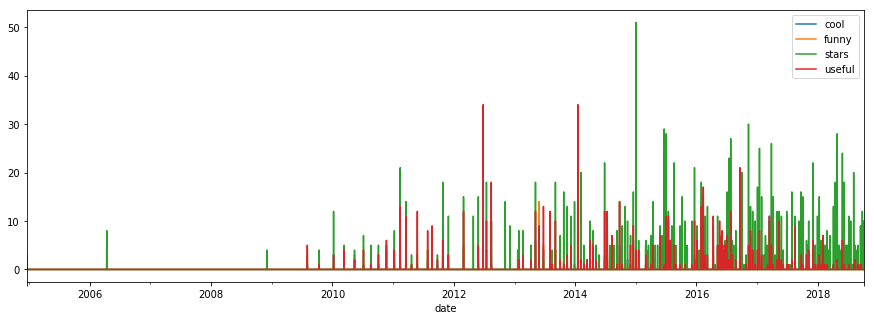

In [14]:
ax=df_group_sum.plot(figsize=(15,5))
highlight(weekend_indices, ax)

In [15]:
df_group_sum.to_csv('df_group_sum.csv')